# Урок 2.  
# Масштабирование признаков.  
# L1- и L2-регуляризация.  
# Стохастический градиентный спуск

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]])

In [3]:
y = [45, 55, 50, 59, 65,
    35, 75, 80, 50, 60]

# Виды масштабирования признаков

![img/normalization.png](img/normalization.png)

### MinMaxScaler  

$$\large X_{norm} = \frac{X – X_{min}}{X_{max}-X_{min}}$$

In [4]:
X[1].min(), X[1].max()

(0, 10)

In [5]:
X[2].min(), X[2].max()

(450, 2000)

In [6]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [7]:
X_norm[1] = (X[1] - X[1].min()) / (X[1].max() - X[1].min())
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e-01, 1.00e-01, 2.00e-01, 1.00e-01, 3.00e-01, 0.00e+00,
        5.00e-01, 1.00e+00, 1.00e-01, 2.00e-01],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [8]:
X_norm[2] = (X[2] - X[2].min()) / (X[2].max() - X[2].min())
X_norm

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.1       , 0.1       , 0.2       , 0.1       , 0.3       ,
        0.        , 0.5       , 1.        , 0.1       , 0.2       ],
       [0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
        0.22580645, 0.67741935, 1.        , 0.        , 0.35483871],
       [1.        , 1.        , 2.        , 1.        , 2.        ,
        1.        , 3.        , 3.        , 1.        , 2.        ]])

### Стандартизация  

$$\large X_{norm} = \frac{X – X_{mean}}{std}$$

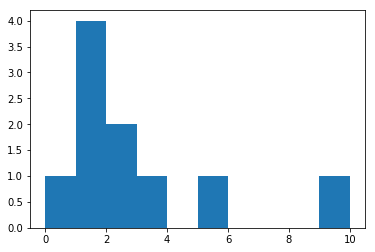

In [9]:
plt.hist(X[1]);

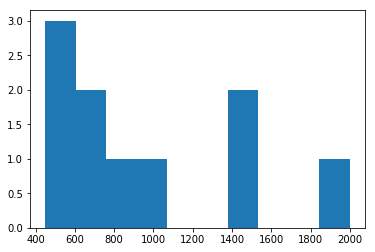

In [10]:
plt.hist(X[2]);

In [11]:
X1_mean = X[1].mean()
X1_mean

2.6

In [12]:
X1_std = X[1].std()
X1_std

2.8000000000000003

In [13]:
X_st = X.copy().astype(np.float64)

In [14]:
X_st[1] = (X[1] - X1_mean) / X1_std
X_st

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00],
       [-5.71428571e-01, -5.71428571e-01, -2.14285714e-01,
        -5.71428571e-01,  1.42857143e-01, -9.28571429e-01,
         8.57142857e-01,  2.64285714e+00, -5.71428571e-01,
        -2.14285714e-01],
       [ 5.00000000e+02,  7.00000000e+02,  7.50000000e+02,
         6.00000000e+02,  1.45000000e+03,  8.00000000e+02,
         1.50000000e+03,  2.00000000e+03,  4.50000000e+02,
         1.00000000e+03],
       [ 1.00000000e+00,  1.00000000e+00,  2.00000000e+00,
         1.00000000e+00,  2.00000000e+00,  1.00000000e+00,
         3.00000000e+00,  3.00000000e+00,  1.00000000e+00,
         2.00000000e+00]])

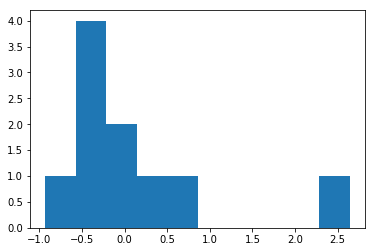

In [15]:
plt.hist(X_st[1]);

In [16]:
def custom_StandardScaler(x):
    res = (x - x.mean()) / x.std()
    return res

In [17]:
X_st[2] = custom_StandardScaler(X[2])

In [18]:
X_st[3] = custom_StandardScaler(X[3])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
        -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

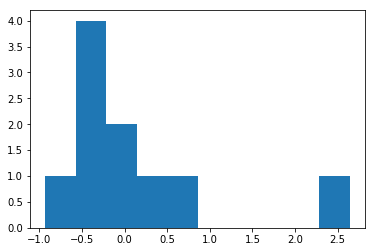

In [19]:
plt.hist(X_st[1]);

# SGD

![img/lr_gradient_descent.gif](img/lr_gradient_descent.gif)

Как нейронные сети обучаются с помощью градиентного спуска:  
https://www.youtube.com/watch?v=IHZwWFHWa-w

In [20]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [21]:
y

[45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

In [22]:
X.T

array([[   1,    1,  500,    1],
       [   1,    1,  700,    1],
       [   1,    2,  750,    2],
       [   1,    1,  600,    1],
       [   1,    3, 1450,    2],
       [   1,    0,  800,    1],
       [   1,    5, 1500,    3],
       [   1,   10, 2000,    3],
       [   1,    1,  450,    1],
       [   1,    2, 1000,    2]])

In [23]:
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [24]:
eval_model(X_st, y, iterations=1000, alpha=1e-2)

# итерация: 100, MSE: 101.42560449485089, веса: [49.75495822  4.88544474  3.81307095  2.90709812]
# итерация: 200, MSE: 41.39707143492693, веса: [56.38611795  5.0787806   3.4249035   3.13585159]
# итерация: 300, MSE: 40.17814106876919, веса: [57.26553941  5.2369591   3.0935337   3.31378751]
# итерация: 400, MSE: 40.04344941436445, веса: [57.3821679   5.37246114  2.81731714  3.45836187]
# итерация: 500, MSE: 39.96240433382931, веса: [57.39763511  5.48820684  2.58705346  3.57608535]
# итерация: 600, MSE: 39.906284639023376, веса: [57.39968637  5.58681682  2.39506555  3.67212691]
# итерация: 700, MSE: 39.867253103526885, веса: [57.39995841  5.67063642  2.23496665  3.7506206 ]
# итерация: 800, MSE: 39.84009090516639, веса: [57.39999448  5.74174249  2.10144167  3.81488121]
# итерация: 900, MSE: 39.821181209465244, веса: [57.39999927  5.80195858  1.99006588  3.86757324]
# итерация: 1000, MSE: 39.80801251880878, веса: [57.3999999   5.85287472  1.8971547   3.91084365]


array([57.3999999 ,  5.85287472,  1.8971547 ,  3.91084365])

In [25]:
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)
            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [26]:
eval_sgd_model(X_st, y, iterations=5000, qty_in_batch=5, alpha=1e-2)

# итерация: 500, MSE: 43.07734817461308, веса: [57.39688223  4.89569145  3.13083031  3.64726936]
# итерация: 1000, MSE: 40.249147898477176, веса: [57.3983744   5.6669802   2.11900835  3.89720251]
# итерация: 1500, MSE: 39.091036048278184, веса: [57.39802075  5.95738573  1.70509514  4.02477204]
# итерация: 2000, MSE: 38.612633875539345, веса: [57.39788179  6.06973208  1.53633522  4.08289139]
# итерация: 2500, MSE: 38.415516211381444, веса: [57.39782653  6.11398149  1.46766478  4.10801854]
# итерация: 3000, MSE: 38.33466377351779, веса: [57.39780438  6.13161055  1.43975486  4.11858931]
# итерация: 3500, MSE: 38.3016242006061, веса: [57.39779545  6.13868428  1.42841935  4.12296955]
# итерация: 4000, MSE: 38.2881583134197, веса: [57.39779185  6.14153509  1.4238174   4.12476895]
# итерация: 4500, MSE: 38.28267948592763, веса: [57.39779039  6.14268706  1.42194959  4.12550441]
# итерация: 5000, MSE: 38.280452760902115, веса: [57.3977898   6.14315331  1.42119161  4.12580412]


array([57.3977898 ,  6.14315331,  1.42119161,  4.12580412])

### Регуляризация  

По сути, регуляризация - это ограничение модели.  
Для нас это, прежде всего, способ уменьшить сложность модели, чтобы предотвратить переобучение.
Проблема: признаки могут иметь линейную (или почти линейную) зависимость.  
Если у нас есть такие признаки, модель будет не устойчива к изменению в данных (большой variance).  
Чтобы побороть этот эффект, модель при обучении дополнительно ограничивают, используя **регуляризацию**.

Подробнее здесь:  
https://habr.com/ru/company/ods/blog/323890/  
и здесь:  
https://habr.com/ru/company/ods/blog/322076/  

L1 регуляризация

$$\Large \mathcal{L}_{reg} \left(X, \vec{y}, \vec{w}\right) = \mathcal{L}\left(X, \vec{y}, \vec{w}\right)  + \lambda \sum_{j=1}^m \left| w_j \right|$$

L2 регуляризация

$$\Large \mathcal{L}_{reg} \left(X, \vec{y}, \vec{w}\right) = \mathcal{L}\left(X, \vec{y}, \vec{w}\right) + \lambda \frac{1}{2} \sum_{j=1}^m w_j^2$$

In [27]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
        #if i % (iterations / 10) == 0:
            #print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [28]:
eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

array([57.39713014,  6.12102515,  1.4301203 ,  4.11587451])

### Домашнее задание:  
1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).
2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?  
3. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации *.

### 1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

In [29]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]])

In [30]:
y = [45, 55, 50, 59, 65,
    35, 75, 80, 50, 60]

In [31]:
lambda_array = [1e-3, 1e-2, 1e-1, 1e0, 1e1]
cnt = 0
for lambda_ in lambda_array:
    res = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=lambda_).reshape(X.shape[0], 1).T
    if cnt == 0:
        result = res
    else:
        result = np.concatenate((result, res))
    cnt += 1
print(result)

[[57.37131434  6.11038803  1.44200443  4.11257825]
 [57.11442786  6.0088442   1.55430443  4.08144793]
 [54.66666667  5.3118901   2.25660813  3.88109191]
 [38.26666667  3.66557478  2.94352608  3.25219037]
 [ 9.56666667  1.42530532  1.35226504  1.37037873]]


In [32]:
result = pd.DataFrame(result, index = lambda_array, columns = ['w0', 'w1', 'w2', 'w3'])
result

,w0,w1,w2,w3
0.001,57.371314,6.110388,1.442004,4.112578
0.010,57.114428,6.008844,1.554304,4.081448
0.100,54.666667,5.311890,2.256608,3.881092
1.000,38.266667,3.665575,2.943526,3.252190
10.000,9.566667,1.425305,1.352265,1.370379


Text(0, 0.5, 'w')

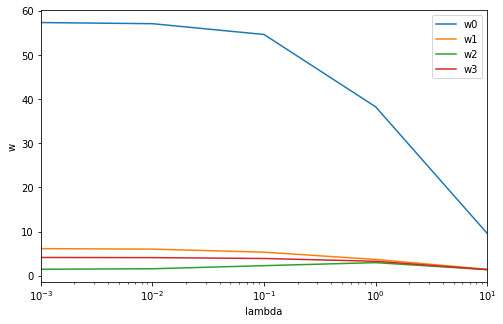

In [40]:
ax = result.plot(logx=True, figsize=(8,5))
ax.set_xlabel("lambda")
ax.set_ylabel("w")

### 2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

In [41]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]])

In [45]:
def custom_StandardScaler(x):
    res = (x - x.mean()) / x.std()
    return res

In [46]:
def custom_Normalizer(x):
    res = (x - x.min()) / (x.max() - x.min())
    return res

In [43]:
X[1].min()

0

In [44]:
X[1].max()

10

In [47]:
X[1].mean()

2.6

In [48]:
X[1].std()

2.8000000000000003

Выполним нормализацию

In [49]:
X_ = custom_Normalizer(X[1])

In [50]:
X_.min()

0.0

In [51]:
X_.max()

1.0

Выполним стандартизацию

In [54]:
X_ = custom_StandardScaler(X_)

In [55]:
X_.mean()

-2.2204460492503132e-17

In [56]:
X_.std()

1.0

In [57]:
X_.min()

-0.9285714285714287

In [58]:
X_.max()

2.6428571428571432

Нормализация сбилась. Еще раз выполним нормализацию.

In [59]:
X_ = custom_Normalizer(X_)

In [60]:
X_.mean()

0.26

In [61]:
X_.std()

0.27999999999999997

In [62]:
X_.min()

0.0

In [64]:
X_.max()

1.0

Стандартизация сбилась. Следовательно, невозможно к одному и тому же признаку применить стандартизацию и нормализацию.

### 3. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации *.

In [69]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * np.sign(W)) 
        #if i % (iterations / 10) == 0:
            #print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [70]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]])

In [71]:
y = [45, 55, 50, 59, 65,
    35, 75, 80, 50, 60]

In [76]:
lambda_array = [1e-1, 1e0, 1e1, 1e2, 1e3, 1e4]
cnt = 0
for lambda_ in lambda_array:
    res = eval_model_reg1(X_st, y, iterations=5000, alpha=1e-2, lambda_=lambda_).reshape(X.shape[0], 1).T
    if cnt == 0:
        result = res
    else:
        result = np.concatenate((result, res))
    cnt += 1
print(result)

[[57.35        6.10222084  1.41557648  4.09520688]
 [56.9         5.92229365  1.29663593  3.90588221]
 [52.4         4.12302167  0.10723043  2.01263552]
 [ 7.4         0.66661154  0.65691737 -0.21308234]
 [-2.57014533  7.13131258 -5.75307693 -1.02799376]
 [80.62114572 57.5424583  52.86535973 55.53079409]]


In [77]:
result = pd.DataFrame(result, index = lambda_array, columns = ['w0', 'w1', 'w2', 'w3'])
result

,w0,w1,w2,w3
0.1,57.350000,6.102221,1.415576,4.095207
1.0,56.900000,5.922294,1.296636,3.905882
10.0,52.400000,4.123022,0.107230,2.012636
100.0,7.400000,0.666612,0.656917,-0.213082
1000.0,-2.570145,7.131313,-5.753077,-1.027994
10000.0,80.621146,57.542458,52.865360,55.530794


Text(0, 0.5, 'w')

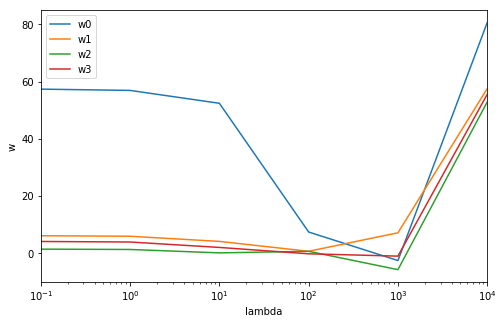

In [78]:
ax = result.plot(logx=True, figsize=(8,5))
ax.set_xlabel("lambda")
ax.set_ylabel("w")